In [1]:
import healpy as hp 
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import os

In [4]:
%load_ext autoreload
%autoreload 2
from taunet.simulation import CMBmap, FGMap, SkySimulation,CMBspectra

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
path = '/marconi/home/userexternal/aidicher/storage'

In [7]:
nsim = 1
tau = 0.06
fg_model = ['s0','d0']

In [8]:
spectra = CMBspectra(tau=tau)

In [6]:
#spectra.tofile(os.path.join(path,'taunet'))

In [7]:
cmb = CMBmap(path,nsim,tau)

In [8]:
Q, U = cmb.QU()

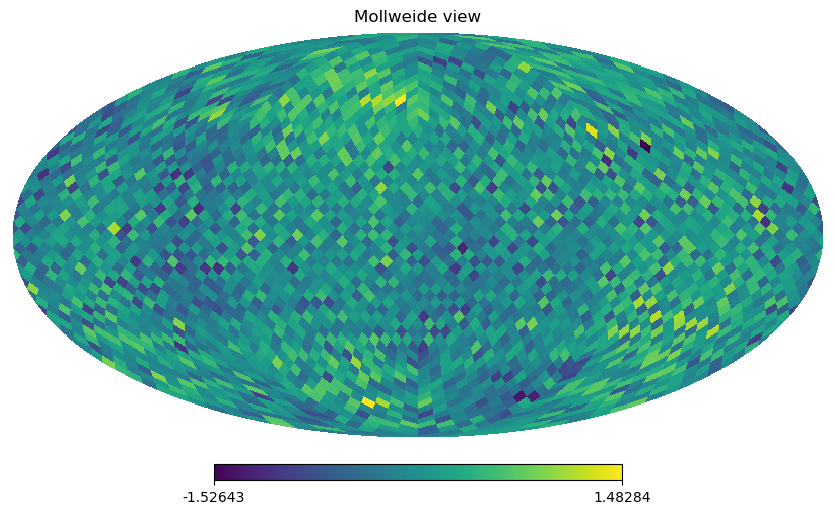

In [9]:
hp.mollview(Q)

In [9]:
fg = FGMap(path)

In [10]:
Qf,Uf = fg.QU(143)

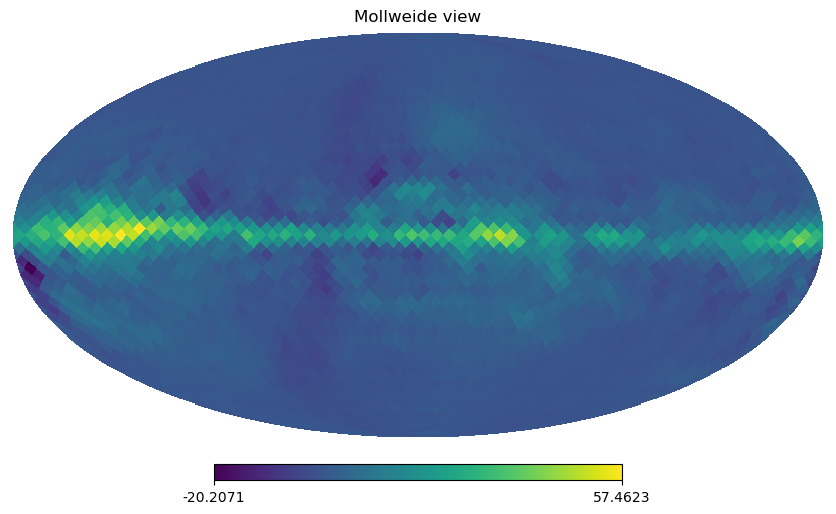

In [11]:
hp.mollview(Qf)

In [12]:
sky = SkySimulation(path,nsim,tau,fg_model)

In [13]:
Q, U = sky.QU(100,unit='K',order='nested')

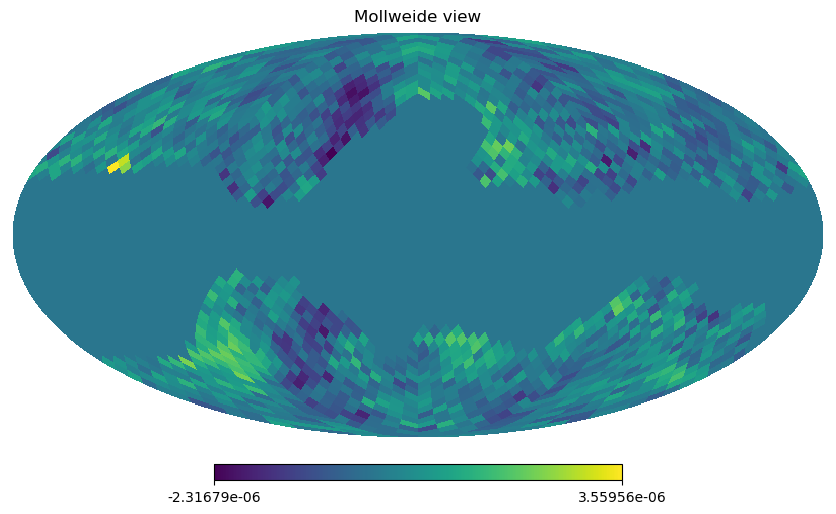

In [14]:
hp.mollview(Q,nest=True)

In [17]:
for i in range(5):
    Q, U = sky.QU(100,idx=i,unit='K',order='nested')
    hp.write_map(os.path.join(path,'taunet0',f'cmb_100_{i}.fits'),[Q*0,Q,U],nest=True,overwrite=True)
    print(f'cmb_143_{i}.fits saved')

setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


cmb_143_0.fits saved


setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


cmb_143_1.fits saved


setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


cmb_143_2.fits saved


setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


cmb_143_3.fits saved


setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


cmb_143_4.fits saved


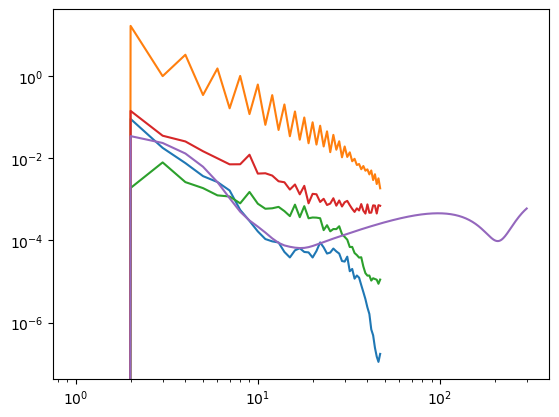

In [40]:
plt.loglog(hp.alm2cl(cmb.Emode(beam=True)))
plt.loglog(hp.alm2cl(fg.Emode(100)))
plt.loglog(hp.alm2cl(sky.noise.Emode(100)))
plt.loglog(hp.alm2cl(sky.Emode(100)))
plt.loglog(cmb.EE)

In [9]:
mask = sky.noise.polmask(order='nested')

In [10]:
hp.write_map(os.path.join(path,'taunet','mask.fits'),[mask,mask,mask],nest=True,overwrite=True)

setting the output map dtype to [dtype('float32'), dtype('float32'), dtype('float32')]


In [2]:
import healpy as hp

In [7]:
hp.read_map('/marconi_work/INF23_litebird/lpagano0/4anto/sroll2/map_sroll2_353psb_coswin_ns16_full.fits')

array([0.00055777, 0.00054563, 0.00058147, ..., 0.00058211, 0.00060855,
       0.00058446], dtype=float32)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [59]:
cls = np.loadtxt('/marconi/home/userexternal/aidicher/luca/lowell-likelihood-analysis/ancillary/lowell_HD_055_078_lensedCls_tau_0.065_As_3.0343.dat')

In [71]:
cls2 = np.loadtxt(os.path.join(path,'taunet','lensed_scalar_cls_0p06.dat'))

In [68]:
len(cls2[:,2])

301

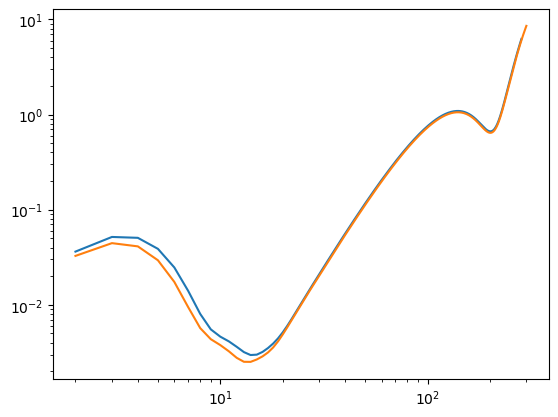

In [72]:
plt.loglog(cls[:,0],cls[:,2])
plt.loglog(cls2[:,0],cls2[:,2])

In [27]:
cls.shape

(283, 5)

In [32]:
ccl = spectra.powers[2:,:]

In [44]:
ccl.shape

(149, 4)

In [45]:
len(ccl)

149

In [46]:
l = np.arange(2,len(ccl)+2)

In [40]:
l.reshape(-1).shape

(147,)

In [49]:
ddd = np.column_stack((l.reshape(-1),ccl))

In [50]:
ddd

array([[ 2.00000000e+00,  9.73535661e+02,  3.26947601e-02,
         1.30753508e-05,  2.62856490e+00],
       [ 3.00000000e+00,  9.21565950e+02,  4.45271229e-02,
         2.58732418e-05,  3.01502296e+00],
       [ 4.00000000e+00,  8.71232608e+02,  4.11939844e-02,
         4.25089919e-05,  2.88506217e+00],
       [ 5.00000000e+00,  8.33328793e+02,  2.94668619e-02,
         6.26223718e-05,  2.50370892e+00],
       [ 6.00000000e+00,  8.07163025e+02,  1.74873220e-02,
         8.57714218e-05,  2.05031554e+00],
       [ 7.00000000e+00,  7.90335248e+02,  9.54885472e-03,
         1.11437895e-04,  1.62827369e+00],
       [ 8.00000000e+00,  7.80069372e+02,  5.81610387e-03,
         1.39033681e-04,  1.28834723e+00],
       [ 9.00000000e+00,  7.75018556e+02,  4.50157426e-03,
         1.67908154e-04,  1.04319167e+00],
       [ 1.00000000e+01,  7.73820813e+02,  3.94948142e-03,
         1.97356383e-04,  8.91008319e-01],
       [ 1.10000000e+01,  7.75159336e+02,  3.44738251e-03,
         2.26628122e-04

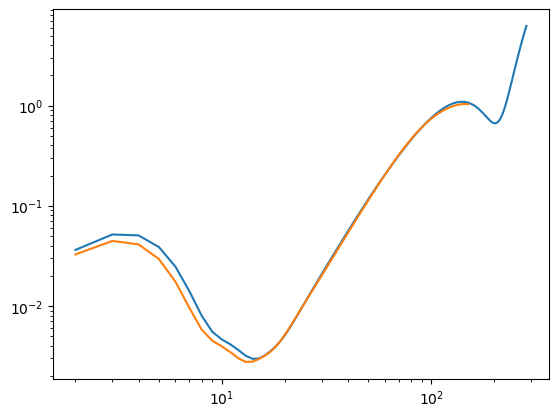

In [52]:
plt.loglog(cls[:,0],cls[:,2])
plt.loglog(ddd[:,0],ddd[:,2])